<a href="https://colab.research.google.com/github/lifelonglearnerit/python_functional_programming/blob/main/functional_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Functional Programming HOWTO
https://docs.python.org/3/howto/functional.html?highlight=iterator#functional-howto-iterators  

In a functional program, input flows through a set of functions. Each function operates on its input and produces some output. Functional style discourages functions with side effects that modify internal state or make other changes that aren’t visible in the function’s return value. Functions that have no side effects at all are called purely functional. Avoiding side effects means not using data structures that get updated as a program runs; every function’s output must only depend on its input.

Functional programming, or FP for short, is a programming paradigm in which the primary method of computation is the evaluation of functions.  

  
In Python, functions are first-class citizens. That means functions have the same characteristics as values like strings and numbers. Anything you would expect to be able to do with a string or number you can do with a function as well.

## lambda $λ$ functions  


In [ ]:
"""lambda <parameter_list>: <experssion>"""
reverse = lambda s: s[::-1]
reverse('Kajak')

'kajaK'

it’s not necessary to assign a variable to a lambda expression before calling it. You can also call the function defined by a lambda expression directly:

In [ ]:
A = [1, 2, 3, 4, 5, 6, 7, 8]
(lambda s: s[::-1])(A)

[8, 7, 6, 5, 4, 3, 2, 1]

In [ ]:
# avg of 3 numbers 
(lambda x1, x2, x3: (x1 + x2 + x3) / 3)(1, 2, 3)

2.0

In [ ]:
# reverse len 
dog = ['N', 'Lucy', 'Enka', 'Lucyna']
sorted(dog, key=lambda d: -len(d))

['Lucyna', 'Lucy', 'Enka', 'N']

In [ ]:
# lambda without parameters, returns value
sense_of_the_life_and_everything = lambda: 42
sense_of_the_life_and_everything()

42

In [ ]:
# returning tuple from the lambda function 
(lambda x: (x**0, x**1, x**2, x**3, x**4))(2)

(1, 2, 4, 8, 16)

In [ ]:
(lambda *args: sum(args))(1,2,3)

6

In [ ]:
(lambda **kwargs: sum(kwargs.values()))(one=1, two=2, three=3)

6

A lambda expression has its own local namespace, so the parameter names don’t conflict with identical names in the global namespace. A lambda expression can access variables in the global namespace, but it can’t modify them.

In [ ]:
my_list = ['Real', ' Python']
(lambda x: ''.join(x))(my_list)

'Real Python'

#map()  
With map(), you can apply a function to each element in an iterable in turn, and map() will return an iterator that yields the results. This can allow for some very concise code because a map() statement can often take the place of an explicit loop.

In [ ]:
# map(<f>, <iterable>)

**map()** doesn’t return a list. It returns an iterator called a *map object*. To obtain the values from the iterator, you need to either iterate over it or use list()

In [ ]:
dog = ['N', 'Lucy', 'Enka', 'Lucyna']
iterator = map(lambda s: s[::-1], dog)
# list(iterator)

In [ ]:
print(next(iterator))
print(next(iterator))
print(next(iterator))
print(next(iterator))

N
ycuL
aknE
anycuL


**map()** applies a function to each object of a list in turn, it can often eliminate the need for an explicit loop. In this case, you can use map() to apply str() to the list objects before joining

In [ ]:
"+".join(map(str, [1, 2, 3, 4, 5]))

'1+2+3+4+5'

In [ ]:
# map(<f>, <iterable₁>, <iterable₂>, ..., <iterableₙ>)
"""
map(<f>, <iterable1>, <iterable2>, ..., <iterablen>) applies <f> to the elements
in each <iterablei> in parallel and returns an iterator that yields the results.
"""

'\nmap(<f>, <iterable1>, <iterable2>, ..., <iterablen>) applies <f> to the elements\nin each <iterablei> in parallel and returns an iterator that yields the results.\n'

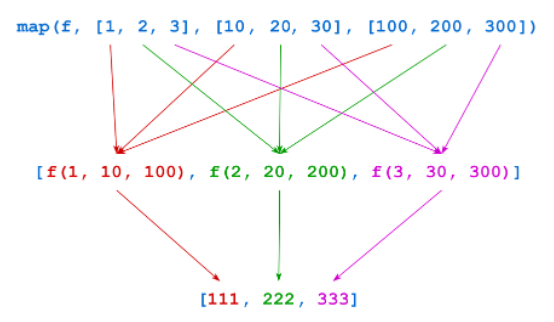

In [ ]:
list(map(lambda a, b, c: a + b + c, [1, 2, 3], [10, 20, 30], [100, 200, 300]))

[111, 222, 333]

In [ ]:
list(
    map(
        (lambda a, b, c: a + b + c), 
        [1, 2, 3], 
        [10, 20, 30], 
        [100, 200, 300]
        )
    )

[111, 222, 333]

# fliter()
allows you to select or filter items from an iterable based on evaluation of the given function  
```filter(f(), iterable)```


In [ ]:
"""
filter(<f>, <iterable>) applies function <f> to each element of <iterable> 
and returns an iterator that yields all items for which <f> is truthy. 
Conversely, it filters out all items for which <f> is falsy.
"""
list(
    filter(
        (lambda x: x > 100),
        [1, 111, 2, 222, 3, 333]
    )
)

[111, 222, 333]

In [ ]:
# is even 
print(list(filter((lambda x: x % 2 == 0), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])))
print(list(filter((lambda x: x % 2 == 0), range(10))))
# is odd
print(
    list(
        filter(
            (lambda x: x % 2 != 0),
            [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
        )
    )
)

[0, 2, 4, 6, 8]
[0, 2, 4, 6, 8]
[1, 3, 5, 7, 9]


In [ ]:
animals = ["cat", "Cat", "CAT", "dog", "Dog", "DOG", "emu", "Emu", "EMU"]

list(filter((lambda word: word.isupper()), animals))

['CAT', 'DOG', 'EMU']


The first argument, function, must be a single-argument function. Typically, you provide a predicate (Boolean-valued) function to this argument. In other words, you provide a function that returns either True or False according to a specific condition.

In [ ]:
# extract positive numbers 
numbers = [-2, -1, 0, 1, 2]
def positive_numb(lst: list) -> list:
    pos_numbs = list()
    for number in lst:
        if number > 0:
            pos_numbs.append(number)
    return pos_numbs
print(positive_numb(numbers))

pn = [x for x in numbers if x > 0]
print(pn)

print(list(filter(lambda n: n > 0, numbers)))

[1, 2]
[1, 2]
[1, 2]


Since filter() is written in C and is highly optimized, its internal implicit loop can be more efficient than a regular for loop regarding execution time. This efficiency is arguably the most important advantage of using the function in Python.

A second advantage of using filter() over a loop is that it returns a filter object, which is an iterator that yields values on demand, promoting a lazy evaluation strategy. Returning an iterator makes filter() more memory efficient than an equivalent for loop.

# **reduce()**
```reduce(f(), iterable)```

applies a function to the items in an iterable two at a time, progressively combining them to produce a single result.  

**reduce(f(), iterable)**  uses *f()*, which must be a function that takes exactly two arguments, to progressively combine the elements in *iterable*. To start, reduce() invokes *f()* on the first two elements of *iterable*. That result is then combined with the third element, then that result with the fourth, and so on until the list is exhausted. Then reduce() returns the final result.

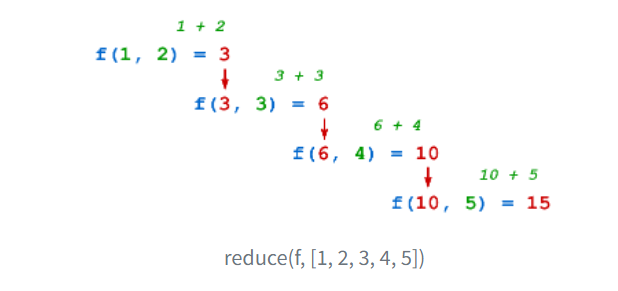

In [ ]:
from functools import reduce
reduce(lambda x, y: x + y, [1, 2, 3, 4, 5])

15

In [ ]:
plus = lambda a, b: a + b 
reduce(plus, ["cat", "dog", "hedgehog", "gecko"])

'catdoghedgehoggecko'

In [ ]:
def factorial(n):
    return reduce(lambda x, y: x * y, range(1, n + 1))
factorial(6)

720

In [ ]:
# max() function with reduce
def gt(x, y):
    return x if x > y else y
reduce(gt, [23, 49, 42, 6, 329, 32])

329

In [ ]:
# calling reduce with initial value
# reduce(<f>, <iterable>, <init>)
reduce(plus, [1, 2, 3, 4, 5], 100)  # (100 + 1 + 2 + 3 + 4 + 5)

115

any operation on a sequence of objects can be expressed as a reduction

In [ ]:
# custom map() in terms of reduce()
numb = [1, 2, 3, 4, 5]
print(list(map(str, numb)))
print(list(map(float, numb)))

[1.0, 2.0, 3.0, 4.0, 5.0]

# Functional programming - real python course
Immutable
in contratry representation of this data as dictionary allows us to change values

In [1]:
import collections 
# create Scientist namedtuple Class 
Scientist = collections.namedtuple('Scientist', [
    'name',
    'field',
    'born',
    'nobel',
])
# create instance of Scientist 
# key word arguments in place of dictionary keys
ada = Scientist(name='Ada Lovelace', field='math', born=1815, nobel=False)
print(ada.name)
print(ada.field)
print(ada.born)
print(ada.nobel)

"""named tuple is immutable, you can't modify fields like in dictionary"""

Ada Lovelace
math
1815
False


"named tuple is immutable, you can't modify fields like in dictionary"

In [2]:
scientists = [
    Scientist(name='Ada Lovelace', field='math', born=1815, nobel=False),
    Scientist(name='Emmy Noether', field='math', born=1882, nobel=False)    
]
scientists
"""in this case we can't change values on Scientist tuple, but we can still 
remove element from scientists list"""

"in this case we can't change values on Scientist tuple, but we can still \nremove element from scientists list"

In [3]:
from pprint import pprint
tscientists = (
    Scientist(name='Ada Lovelace', field='math', born=1815, nobel=False),
    Scientist(name='Emmy Noether', field='math', born=1882, nobel=False),
    Scientist(name='Marie Curie', field='physics', born=1867, nobel=True),
    Scientist(name='Tu Youyou', field='chemistry', born=1930, nobel=True),
    Scientist(name='Ada Yonath', field='chemistry', born=1939, nobel=True),
    Scientist(name='Vera Rubin', field='Astronomy', born=1929, nobel=False),
    Scientist(name='Sally Ride', field='physics', born=1951, nobel=False),
)
"""now we can't delete elements nor we can't modify them, we can just access elements"""
print(tscientists[2].name)
pprint(tscientists)

Marie Curie
(Scientist(name='Ada Lovelace', field='math', born=1815, nobel=False),
 Scientist(name='Emmy Noether', field='math', born=1882, nobel=False),
 Scientist(name='Marie Curie', field='physics', born=1867, nobel=True),
 Scientist(name='Tu Youyou', field='chemistry', born=1930, nobel=True),
 Scientist(name='Ada Yonath', field='chemistry', born=1939, nobel=True),
 Scientist(name='Vera Rubin', field='Astronomy', born=1929, nobel=False),
 Scientist(name='Sally Ride', field='physics', born=1951, nobel=False))


# Applying ```filter()``` to namedtuple

In [4]:
help(filter)

Help on class filter in module builtins:

class filter(object)
 |  filter(function or None, iterable) --> filter object
 |  
 |  Return an iterator yielding those items of iterable for which function(item)
 |  is true. If function is None, return the items that are true.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [5]:
"""filter function will retrun iterator with scientists that won Nobel prize"""
filter(lambda x: x.nobel is True, tscientists)

In [6]:
"""filter has returned iterator from which we need to extract information"""
nobel_prize = filter(lambda x: x.nobel is True, tscientists)
next(nobel_prize)

Scientist(name='Marie Curie', field='physics', born=1867, nobel=True)

In [7]:
next(nobel_prize)

Scientist(name='Tu Youyou', field='chemistry', born=1930, nobel=True)

In [8]:
next(nobel_prize)

Scientist(name='Ada Yonath', field='chemistry', born=1939, nobel=True)

In [9]:
"""turning results to immutable datatype - tuple"""
nobel = tuple(filter(lambda x: x.nobel is True, tscientists))
pprint(nobel)

(Scientist(name='Marie Curie', field='physics', born=1867, nobel=True),
 Scientist(name='Tu Youyou', field='chemistry', born=1930, nobel=True),
 Scientist(name='Ada Yonath', field='chemistry', born=1939, nobel=True))


In [10]:
pprint(tuple(filter(lambda x: x.field == 'physics', tscientists)))

(Scientist(name='Marie Curie', field='physics', born=1867, nobel=True),
 Scientist(name='Sally Ride', field='physics', born=1951, nobel=False))


In [11]:
pprint(
    tuple(
        filter(
            lambda x: x.field == 'physics' and 
            x.nobel is True, 
            tscientists
            )
        )
    )

(Scientist(name='Marie Curie', field='physics', born=1867, nobel=True),)


# Application and evaluation of function vs explicit loop

In [13]:
print("explicit loop")

for x in tscientists:
    if x.nobel is True:
        print(x)

print("\nfunction application and evaluation")

def nobel_filter(x):
    return x.nobel is True
pprint(tuple(filter(nobel_filter, tscientists)))

explicit loop
Scientist(name='Marie Curie', field='physics', born=1867, nobel=True)
Scientist(name='Tu Youyou', field='chemistry', born=1930, nobel=True)
Scientist(name='Ada Yonath', field='chemistry', born=1939, nobel=True)

function application and evaluation
(Scientist(name='Marie Curie', field='physics', born=1867, nobel=True),
 Scientist(name='Tu Youyou', field='chemistry', born=1930, nobel=True),
 Scientist(name='Ada Yonath', field='chemistry', born=1939, nobel=True))


# Pythonic version of filter function

In [14]:
# list comperhension 
pprint([x for x in tscientists if x.nobel is True])

[Scientist(name='Marie Curie', field='physics', born=1867, nobel=True),
 Scientist(name='Tu Youyou', field='chemistry', born=1930, nobel=True),
 Scientist(name='Ada Yonath', field='chemistry', born=1939, nobel=True)]


In [15]:
# list comperhension to tuple 
pprint(tuple([x for x in tscientists if x.nobel is True]))


(Scientist(name='Marie Curie', field='physics', born=1867, nobel=True),
 Scientist(name='Tu Youyou', field='chemistry', born=1930, nobel=True),
 Scientist(name='Ada Yonath', field='chemistry', born=1939, nobel=True))


# Generators:  
Generator functions allow you to declare a function that behaves like an iterator, i.e. it can be used in a for loop.  
https://wiki.python.org/moin/Generators

we can turn a list comprehension into a generator expression by replacing the square brackets ("[ ]") with parentheses. Alternately, we can think of list comprehensions as generator expressions wrapped in a list constructor.  

```
   # list comprehension
   doubles = [2 * n for n in range(50)]
   
   # same as the list comprehension above
   doubles = list(2 * n for n in range(50))
```

This also means that we can use the same syntax we have been using for list comprehensions to build generators.  

**The performance improvement from the use of generators is the result of the lazy (on demand) generation of values, which translates to lower memory usage.**

We don't build full list in memory!   
Say, we had to compute the sum of the first n, say 1,000,000, non-negative numbers.
```
# Note: Python 2.x only
# using a non-generator
sum_of_first_n = sum(range(1000000)) 
# using a generator
sum_of_first_n = sum(xrange(1000000))
```
Note that both lines are identical in form, but the one using range is much more expensive.

When we use range we build a 1,000,000 element list in memory and then find its sum. This is a waste, considering that we use these 1,000,000 elements just to compute the sum.

This waste becomes more pronounced as the number of elements (our n) becomes larger, the size of our elements become larger, or both.

On the other hand, when we use xrange, we do not incur the cost of building a 1,000,000 element list in memory. The generator created by xrange will generate each number, which sum will consume to accumulate the sum. 
**Note:** a generator will provide performance benefits only if we do not intend to use that set of generated values more than once.

In [16]:
# generator experssion directly to tuple 
pprint(tuple(x for x in tscientists if x.nobel is True))

(Scientist(name='Marie Curie', field='physics', born=1867, nobel=True),
 Scientist(name='Tu Youyou', field='chemistry', born=1930, nobel=True),
 Scientist(name='Ada Yonath', field='chemistry', born=1939, nobel=True))


# The ```map()``` function

In [17]:
help(map)

Help on class map in module builtins:

class map(object)
 |  map(func, *iterables) --> map object
 |  
 |  Make an iterator that computes the function using arguments from
 |  each of the iterables.  Stops when the shortest iterable is exhausted.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



# Iterator:  
An iterator is an object representing a stream of data; this object returns the data one element at a time. A Python iterator must support a method called __next__() that takes no arguments and always returns the next element of the stream. If there are no more elements in the stream, __next__() must raise the StopIteration exception. Iterators don’t have to be finite, though; it’s perfectly reasonable to write an iterator that produces an infinite stream of data.

An object is called iterable if you can get an iterator for it.  

Note that **you can only go forward in an iterator**; there’s no way to get the previous element, reset the iterator, or make a copy of it. 

https://docs.python.org/3/howto/functional.html?highlight=iterator#functional-howto-iterators

In [18]:
names_and_ages = tuple(map(
    lambda x: {'name': x.name, 'age': 2022 - x.born},
    tscientists
))
pprint(names_and_ages)

({'age': 207, 'name': 'Ada Lovelace'},
 {'age': 140, 'name': 'Emmy Noether'},
 {'age': 155, 'name': 'Marie Curie'},
 {'age': 92, 'name': 'Tu Youyou'},
 {'age': 83, 'name': 'Ada Yonath'},
 {'age': 93, 'name': 'Vera Rubin'},
 {'age': 71, 'name': 'Sally Ride'})
